In [38]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [39]:
df = pd.read_csv("US_Heart_Patients (1).csv")

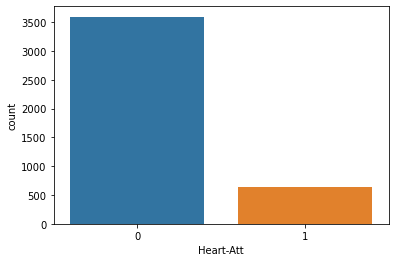

In [40]:
sns.countplot(x=df["Heart-Att"])
plt.show()

In [41]:
df["Heart-Att"].value_counts()

0    3596
1     644
Name: Heart-Att, dtype: int64

#### Resampling

In [42]:
from sklearn.utils import resample

In [43]:
df_majority = df.loc[df["Heart-Att"]==0,"Heart-Att"]

In [44]:
df_minority = df.loc[df["Heart-Att"]==1,"Heart-Att"]

In [45]:
df_upsample = resample(df_minority,replace=True,n_samples=3596,random_state=1)

In [46]:
final_upsampled=pd.concat([df_upsample,df_majority])

In [47]:
final_upsampled.value_counts(1)

1    0.5
0    0.5
Name: Heart-Att, dtype: float64

### SMOTE

In [48]:
from imblearn.over_sampling import SMOTE

In [49]:
#Not to be applied on test data

In [124]:
sm = SMOTE(random_state=42,sampling_strategy=0.3)

In [125]:
cat_col = df.select_dtypes(exclude=['int','float']).columns.tolist()
cont_col = df.select_dtypes(include=['int','float']).columns.tolist()

In [126]:
for i in cat_col:
    if df[i].isnull().sum()!=0:
        df[i].fillna(value=df[i].mode()[0],inplace=True)

In [127]:
for i in cont_col:
     if df[i].isnull().sum()!=0:
        df[i].fillna(value=df[i].mean(),inplace=True)

In [128]:
df.isnull().sum()[df.isnull().sum()!=0]

Series([], dtype: int64)

In [129]:
df["Gender"].unique()

array(['Male', 'Female'], dtype=object)

In [130]:
X = df.iloc[:,0:-1]
Y = df.loc[:,"Heart-Att"]

In [131]:
X.isnull().sum()[X.isnull().sum()!=0]

Series([], dtype: int64)

In [132]:
X["Gender"] = X["Gender"].map({"Male":1,"Female":2})

In [133]:
from sklearn.model_selection import train_test_split

In [134]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.3,random_state=1)

In [135]:
X_train_res,Y_train_res = sm.fit_resample(X_train,Y_train)

In [136]:
Y_train_res.value_counts(1)

0    0.769301
1    0.230699
Name: Heart-Att, dtype: float64